<a href="https://www.kaggle.com/code/chenkuanpu/cardiovascular-risk?scriptVersionId=134293457" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# *Import Libraries*

In [1]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import time
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf

seed = 42

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
data = pd.read_csv('/kaggle/input/cardiovascular-risk-data/data_cardiovascular_risk.csv')
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [3]:
# Check data types
print(data.dtypes)

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


# *Data Wrangling*

In [4]:
# Drop non-relevant column
df = data.drop('id', axis=1)
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
print(df.shape[0], 'records and ', df.shape[1], ' attributes.')

3390 records and  16  attributes.


In [6]:
# Missing values
(df.isnull().sum()/data.shape[0]*100).to_frame().rename(columns={0: 'Null %'})

,Null %
age,0.000000
education,2.566372
sex,0.000000
is_smoking,0.000000
cigsPerDay,0.648968
BPMeds,1.297935
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000
totChol,1.120944


In [7]:
df['education'].fillna(df['education'].value_counts().idxmax(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].value_counts().idxmax(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)

In [8]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# *Exploratory Data Analysis (EDA)*

## **Demographic**

#### Total Samples

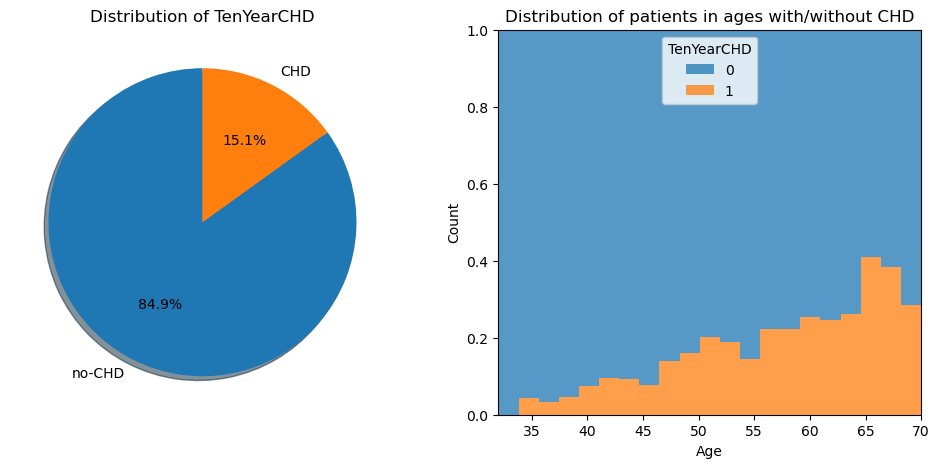

In [9]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,5))
ax0.pie(df['TenYearCHD'].value_counts(),
        labels=['no-CHD', 'CHD'],
        startangle=90,
        shadow=True,
        autopct='%.1f%%')
ax0.set_title('Distribution of TenYearCHD')

sns.histplot(data=df, x='age', hue='TenYearCHD', multiple='fill', edgecolor='none', ax=ax1)
ax1.set_title('Distribution of patients in ages with/without CHD')
ax1.set_xlabel('Age')

plt.show()

Approximately 15.1% of individuals in this dataset are at risk of developing Coronary Heart Disease (CHD). The visualization reveals that the dataset primarily consists of middle-aged individuals, and as age increases, there is a gradual decrease in the number of samples. Notably, we can observe a corresponding increase in the proportion of individuals with CHD as age increases.

#### Age Analysis

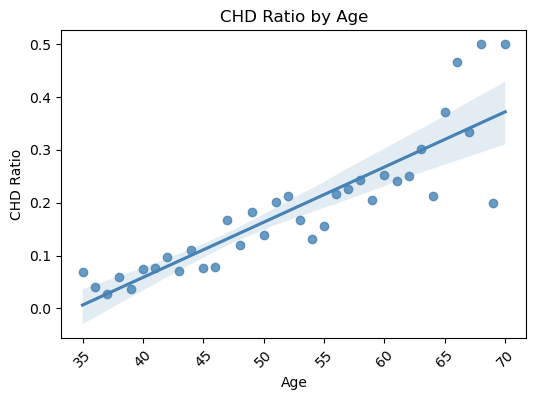

In [10]:
# Plot the distribution of CHD rate by age
age_chd_counts = df.groupby(['age', 'TenYearCHD']).size().unstack()
age_chd_ratio = age_chd_counts[1] / (age_chd_counts[0] + age_chd_counts[1])

plt.figure(figsize=(6, 4))
sns.regplot(x=age_chd_ratio.index, y=age_chd_ratio.values, color='steelblue')

plt.xlabel('Age')
plt.ylabel('CHD Ratio')
plt.title('CHD Ratio by Age')
plt.xticks(rotation=45)
plt.show()

From the regression plot of CHD rates and age, it is evident that the likelihood of developing CHD is dependent on age. The CHD rate shows a gradual increase as age progresses, indicating a positive correlation between age and the risk of CHD, as indicated by the regression line.

#### Education Level Anlaysis

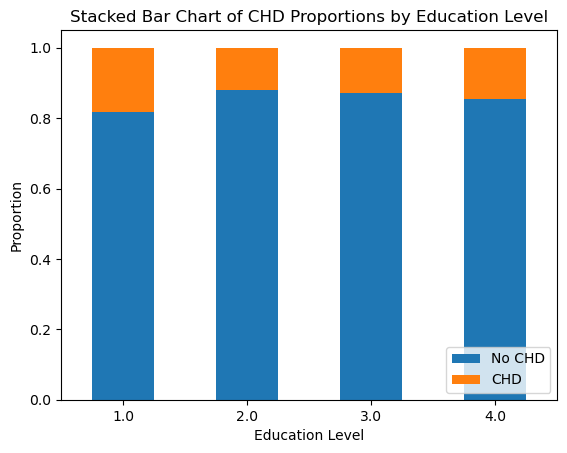

In [11]:
# Effect of education level
education_counts = df.groupby(['education', 'TenYearCHD']).size().unstack()
education_proportions = education_counts.div(education_counts.sum(axis=1), axis=0)

ax = education_proportions.plot(kind='bar', stacked=True)
plt.ylabel('Proportion')
plt.xlabel('Education Level')
plt.xticks(rotation=0)
plt.title('Stacked Bar Chart of CHD Proportions by Education Level')
plt.legend(['No CHD', 'CHD'], loc='lower right')
plt.show()

The analysis of education level indicates that individuals with the lowest level of education have a higher risk of CHD compared to those with higher education levels. On the other hand, the other levels of education show similar proportions of CHD patients.

#### Patient Gender Analysis

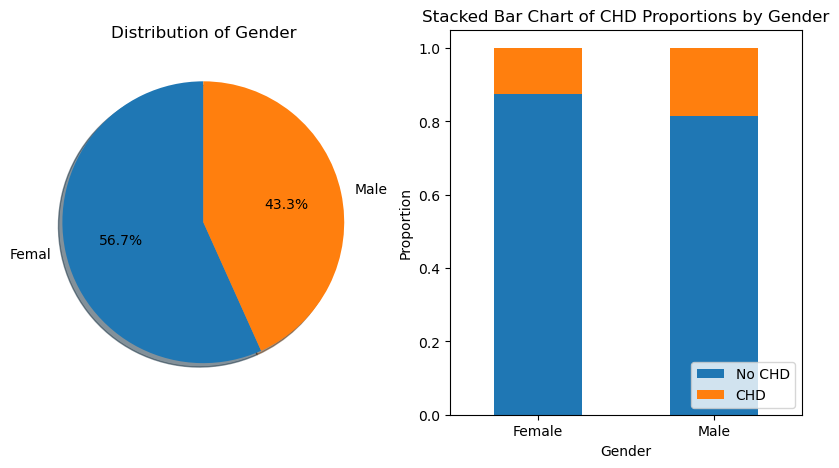

In [12]:
# Distribution of gender
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,5))
ax0.pie(df['sex'].value_counts(),
        labels=['Femal', 'Male'],
        startangle=90,
        shadow=True,
        autopct='%.1f%%')
ax0.set_title('Distribution of Gender')

# Distribution of CHD by sex
sex_counts = df.groupby(['sex', 'TenYearCHD']).size().unstack()
sex_proportions = sex_counts.div(sex_counts.sum(axis=1), axis=0)
sex_proportions.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Proportion')
ax1.set_xlabel('Gender')
ax1.set_xticklabels(['Female', 'Male'], rotation=0)
ax1.set_title('Stacked Bar Chart of CHD Proportions by Gender')
ax1.legend(['No CHD', 'CHD'], loc='lower right')
plt.show()

Although the sample sizes and CHD rates of males and females are slightly different, we can say that the sample sizes of males and females and the CHD rates of males and females are similar.

#### Patient behavior

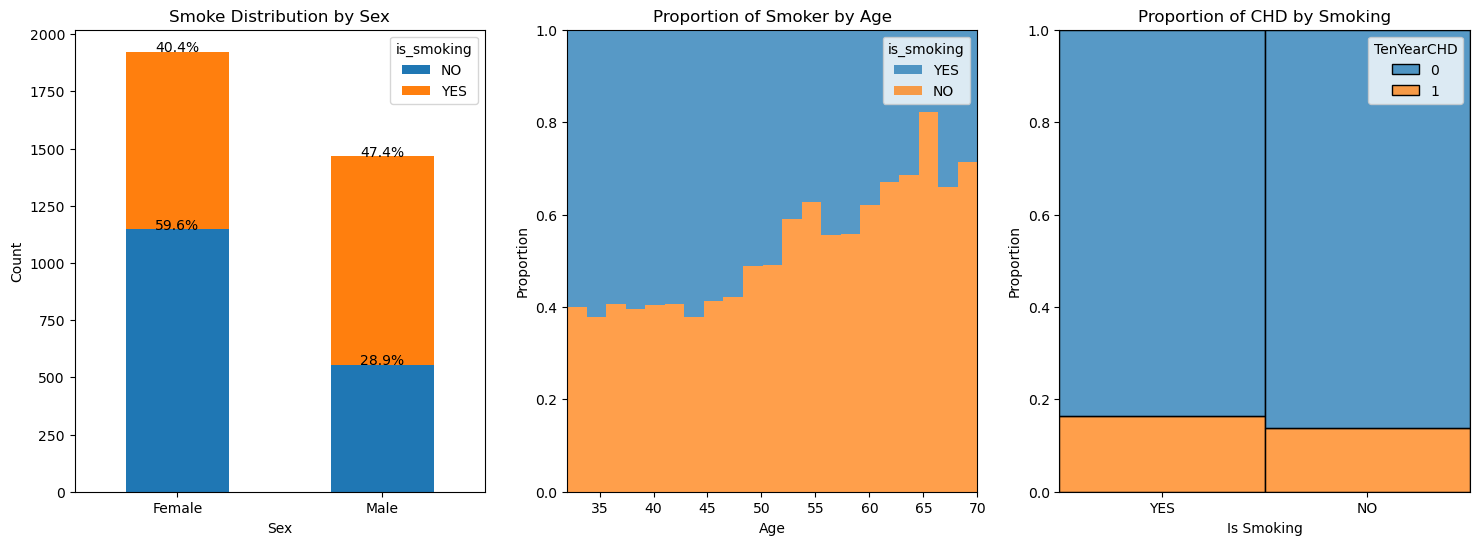

In [13]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 6))

smoke_counts_sex = df.groupby(['sex', 'is_smoking']).size().unstack()
smoke_counts_sex = smoke_counts_sex.rename(index={'M': 'Male', 'F': 'Female'})
smoke_counts_sex.plot.bar(ax=ax0, stacked=True)

totals_sex = smoke_counts_sex.sum(axis=1)
for p in ax0.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentage = height / totals_sex[int(x)]
    ax0.annotate(f'{percentage:.1%}', (x + width/2, y + height), ha='center')

ax0.set_title('Smoke Distribution by Sex')
ax0.set_ylabel('Count')
ax0.set_xlabel('Sex')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=0)

sns.histplot(data=df, x='age', hue='is_smoking', multiple='fill', edgecolor=None, ax=ax1)
ax1.set_title('Proportion of Smoker by Age')
ax1.set_ylabel('Proportion')
ax1.set_xlabel('Age')

sns.histplot(data=df, x='is_smoking', hue='TenYearCHD', multiple='fill', ax=ax2)
ax2.set_title('Proportion of CHD by Smoking')
ax2.set_ylabel('Proportion')
ax2.set_xlabel('Is Smoking')

plt.show()

From the left figure, we observe that the proportion of male smokers is higher than that of females. This suggests that smoking is more prevalent among men in the given dataset.

When examining the distribution of smoking habits by age, as shown in the middle figure, it is found that the proportion of smokers increases with age. However, from the right figure, it can be seen that there is a weak relationship between smoking and the risk of CHD.

These findings indicate that smoking is more common among males and that the prevalence of smoking tends to increase with age. However, the relationship between smoking and the risk of CHD is not strongly evident in the provided data.

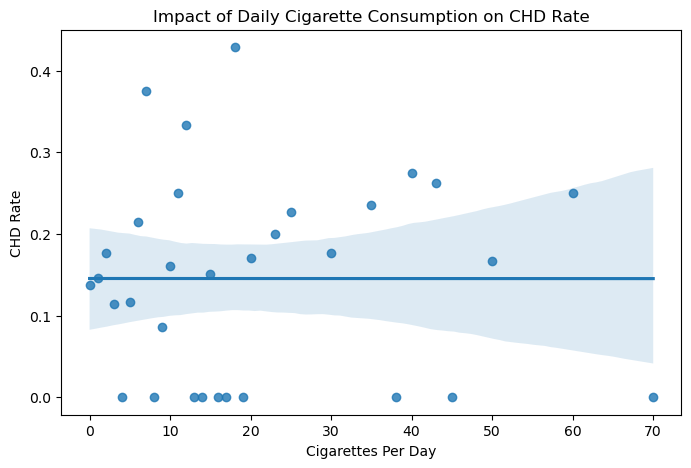

In [14]:
CHD_rate = df.groupby(['cigsPerDay'])['TenYearCHD'].mean()
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x=CHD_rate.index, y=CHD_rate.values)
plt.title('Impact of Daily Cigarette Consumption on CHD Rate')
plt.xlabel('Cigarettes Per Day')
plt.ylabel('CHD Rate')
plt.show()

The regression line analysis revealed a weak correlation between the incidence of coronary heart disease and the number of cigarettes smoked per day. This finding suggests that the relationship between smoking and coronary heart disease can vary among individuals. 

## **Medical history**

In [15]:
# Define pie and bar chart
def get_pie_bar(category, label, title):
    fig, (ax0, ax1)=plt.subplots(1, 2, figsize=(10,4))
    proportion = df[category].value_counts()/df[category].value_counts().sum()
    ax0.pie(proportion, startangle=90, shadow=True,
            labels=['No ' + label, label], autopct='%.1f%%', explode=(0.1, 0))
    ax0.set_title('Proportion of Patients ' + title)

    chd_counts = df.groupby([category, 'TenYearCHD']).size().unstack()
    chd_proportions = chd_counts.div(chd_counts.sum(axis=1), axis=0)
    chd_proportions.plot(kind='bar', stacked=True, ax=ax1)
    ax1.set_title('Proportion of CHD by ' + category)
    ax1.set_xlabel('')
    ax1.set_ylabel('Proportion [%]')
    ax1.set_xticklabels(['No ' + label, label], rotation=0)
    ax1.legend(loc='lower left')

    for container in ax1.containers:
        for rect in container:
            width = rect.get_width()
            height = rect.get_height()
            x = rect.get_x()
            y = rect.get_y()
            ax1.annotate(f'{height:.1%}', xy=(x + width / 2, y + height / 2),
                         xytext=(0, 3), textcoords='offset points',
                         ha='center', va='center')
    plt.show()

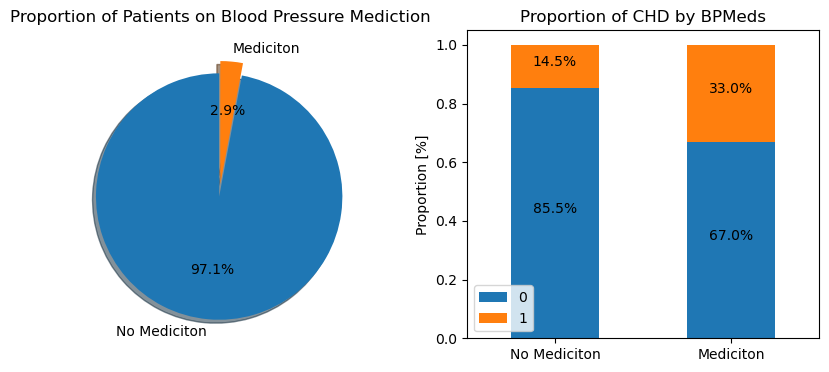

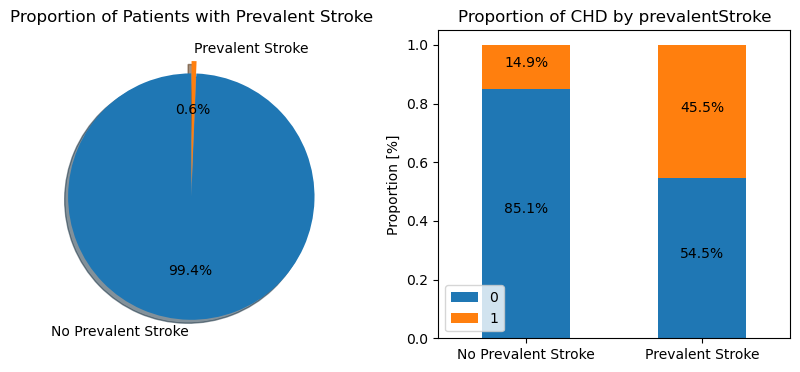

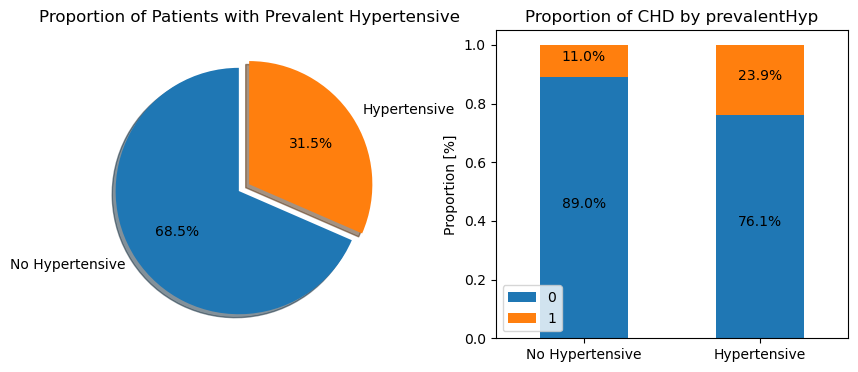

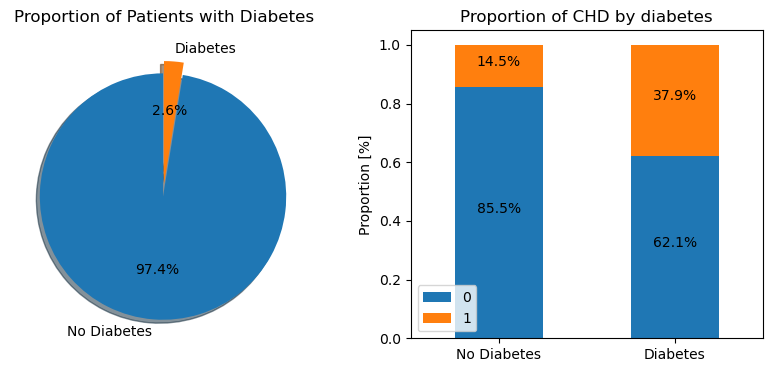

In [16]:
# Check the relation of BPMeds and CHD
get_pie_bar('BPMeds', 'Mediciton', 'on Blood Pressure Mediction')
# Check the relation of prevalentStroke and CHD
get_pie_bar('prevalentStroke', 'Prevalent Stroke', 'with Prevalent Stroke')
# Check the relation of prevalentHyp and CHD
get_pie_bar('prevalentHyp', 'Hypertensive', 'with Prevalent Hypertensive')
# Check the relation of diabetes and CHD
get_pie_bar('diabetes', 'Diabetes', 'with Diabetes')

From the bar charts, it is evident that the number of patients who are prescribed blood pressure medication, have a history of stroke or hypertension, and also have diabetes is approximately twice that of individuals without these conditions. However, when considering the information from the pie charts, it is worth noting that the number of samples for patients on blood pressure medication, stroke cases, and diabetes patients is significantly smaller compared to the number of samples for hypertensive patients. This imbalance in sample sizes can potentially affect the interpretation of the data and should be taken into consideration.

## **Current medical**

According to the report from [CDC (Centers for Disease Control and Preventrion)](https://www.cdc.gov/bloodpressure/about.htm), the classified as follows:  

|Category|Systolic (mm-Hg)|Diastolic (mm-Hg)|
|--|--|--|
|Normal|<120|<80|
|Elevated|120-129|<80|
|Hypertension|≥130|≥80|

#### Blood Pressure Analysis

In [17]:
med_df = df.copy()
med_df.loc[(med_df['sysBP'] < 120) & (med_df['diaBP'] < 80), 'BP_Category'] = 'Normal'
med_df.loc[(med_df['sysBP'] >= 120) & (med_df['sysBP'] < 130) & (med_df['diaBP'] < 80), 'BP_Category'] = 'Elevated'
med_df.loc[(med_df['sysBP'] >= 130) | (med_df['diaBP'] >= 80), 'BP_Category'] = 'Hypertension'
med_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,BP_Category
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,Hypertension
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,Hypertension
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,Normal
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,Hypertension
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,Hypertension


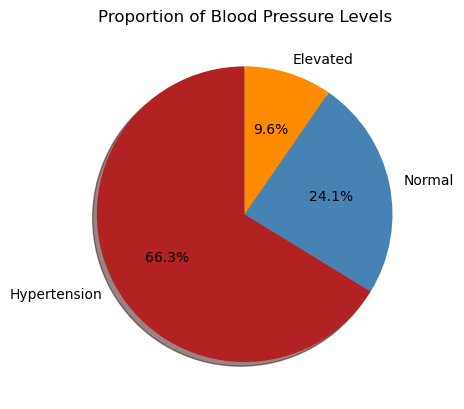

In [18]:
BP_colors = {'Normal': 'steelblue', 'Elevated': 'darkorange', 'Hypertension': 'firebrick'}
plt.pie(med_df['BP_Category'].value_counts(), labels=med_df['BP_Category'].value_counts().index,
        startangle=90, shadow=True, autopct='%.1f%%',
        colors=[BP_colors[val] for val in med_df['BP_Category'].value_counts().index])
plt.title('Proportion of Blood Pressure Levels')
plt.show()

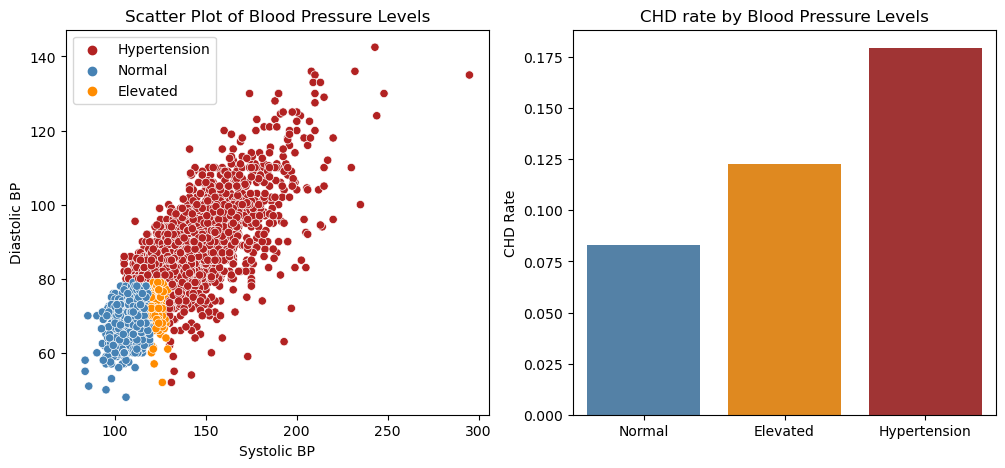

In [19]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(12,5))


sns.scatterplot(data=med_df, x='sysBP', y='diaBP', hue='BP_Category',
                palette=BP_colors, ax=ax0)
ax0.set_xlabel('Systolic BP')
ax0.set_ylabel('Diastolic BP')
ax0.set_title('Scatter Plot of Blood Pressure Levels')
ax0.legend(title='')

BP_CHD = med_df.groupby('BP_Category')['TenYearCHD'].mean().to_frame()
BP_CHD_sorted = BP_CHD.sort_values(by='TenYearCHD')
sns.barplot(data=BP_CHD_sorted, x=BP_CHD_sorted.index, y='TenYearCHD',palette=BP_colors, ax=ax1)
ax1.set_ylabel('CHD Rate')
ax1.set_xlabel('')
ax1.set_title('CHD rate by Blood Pressure Levels')

plt.show()

Based on the scatter plot, it is evident that a significant proportion of individuals in this dataset have a risk of hypertension, as indicated by the higher values of systolic and diastolic blood pressure. This suggests that hypertension is prevalent among the participants.

Additionally, the bar chart provides insights into the relationship between hypertension risk categories and the rate of CHD. It shows that as the hypertension risk increases, the CHD rate also increases. This indicates a positive association between hypertension and the risk of developing coronary heart disease.

As reported by [Cleveland Clinic](https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean), high cholesterol is having _*total cholesterol above 200 mg/dL*_. This condition is also called hyperlipidemia. The cholesterol levels are as follows:  

|Cholesterol Levels |Total Cholesterol (mg/dL)|
|--|--|
|Dangerous|≥240|
|At risk|200-239|
|Healthy|<200|

#### Cholester Level Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

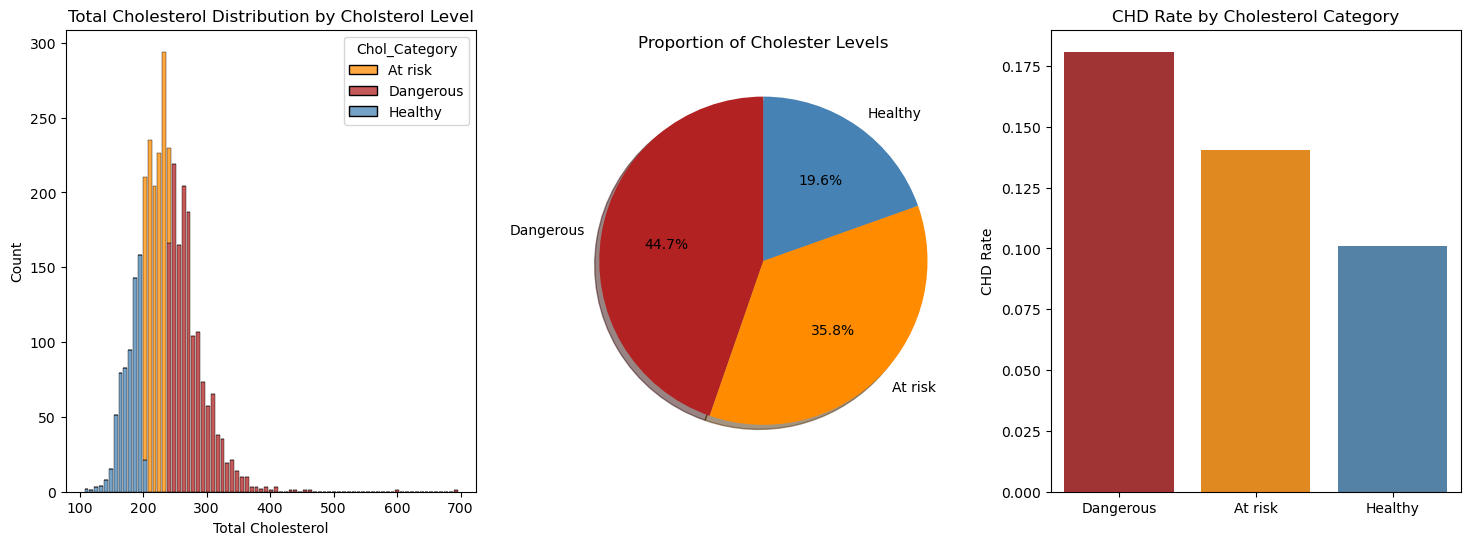

In [20]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18,6))

Chol_colors = {'Healthy': 'steelblue', 'At risk': 'darkorange', 'Dangerous': 'firebrick'}
med_df.loc[(med_df['totChol'] < 200), 'Chol_Category'] = 'Healthy'
med_df.loc[(med_df['totChol'] >= 200) & (med_df['totChol'] < 240), 'Chol_Category'] = 'At risk'
med_df.loc[(med_df['totChol'] >= 240), 'Chol_Category'] = 'Dangerous'

sns.histplot(data=med_df, x='totChol', multiple='stack', hue='Chol_Category',
             shrink=0.8, palette=Chol_colors, ax=ax0)
ax0.set_title('Total Cholesterol Distribution by Cholsterol Level')
ax0.set_xlabel('Total Cholesterol')

ax1.pie(med_df['Chol_Category'].value_counts(), labels=med_df['Chol_Category'].value_counts().index,
        startangle=90, shadow=True, autopct='%.1f%%',
        colors=[Chol_colors[val] for val in med_df['Chol_Category'].value_counts().index])
ax1.set_title('Proportion of Cholester Levels')

med_df_sorted = med_df.sort_values(by='TenYearCHD')
sns.barplot(data=med_df_sorted, x='Chol_Category',y='TenYearCHD', palette=Chol_colors, errorbar=None, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('CHD Rate')
ax2.set_title('CHD Rate by Cholesterol Category')

plt.show

The histogram provides a clear division into three categories: healthy level, risk level (which has the highest number of samples), and dangerous level at high total cholesterol. This division allows for a better understanding of the distribution of cholesterol levels among the samples and helps identify the proportion of individuals at different risk levels.

From the pie chart, it can be observed that approximately 20% of the total samples belong to the healthy cholesterol level category. This suggests that the majority of people in this analysis are at risk of hyperlipidemia.

CHD rate by Cholesterol level further supports the notion that higher cholesterol levels increase the CHD rate. The bar chart demonstrates the increasing trend of CHD rate as cholesterol level progress. Additionally, it is also observed that this trend is similar to the blood pressure level, indicating a correlation between these two factors.

#### BMI analysis

Although BMI may vary depending on whether the person being measured is physically fit or not, it is still a widely used and measurable indicator for most individuals. **CDC** also provide the [standard weight status categories](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html):

|Weight Status|BMI|
|--|--|
|Underweight|<18.5|
|Healthy|18.5–24.9|
|Overweight|25.0-29.9|
|Obesity|≥30.0|

<function matplotlib.pyplot.show(close=None, block=None)>

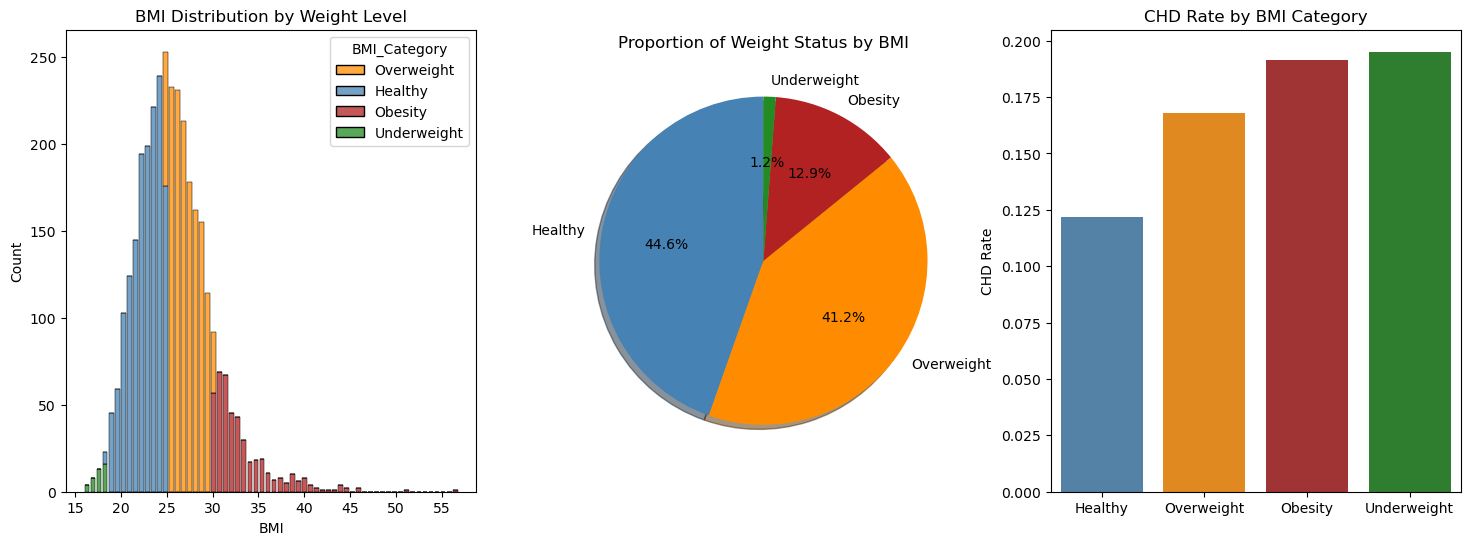

In [21]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(18,6))

BMI_colors = {'Underweight': 'forestgreen', 'Healthy': 'steelblue', 'Overweight': 'darkorange', 'Obesity': 'firebrick'}
med_df.loc[(med_df['BMI'] < 18.5), 'BMI_Category'] = 'Underweight'
med_df.loc[(med_df['BMI'] >= 18.5) & (med_df['BMI'] < 25), 'BMI_Category'] = 'Healthy'
med_df.loc[(med_df['BMI'] >= 25) & (med_df['BMI'] < 30), 'BMI_Category'] = 'Overweight'
med_df.loc[(med_df['BMI'] >= 30), 'BMI_Category'] = 'Obesity'

sns.histplot(data=med_df, x='BMI', multiple='stack', hue='BMI_Category',
             shrink=0.8, palette=BMI_colors, ax=ax0)
ax0.set_title('BMI Distribution by Weight Level')
ax0.set_xlabel('BMI')

ax1.pie(med_df['BMI_Category'].value_counts(), labels=med_df['BMI_Category'].value_counts().index,
        startangle=90, shadow=True, autopct='%.1f%%',
        colors=[BMI_colors[val] for val in med_df['BMI_Category'].value_counts().index])
ax1.set_title('Proportion of Weight Status by BMI')

BMI_CHD = med_df.groupby('BMI_Category')['TenYearCHD'].mean().to_frame()
BMI_CHD_sorted = BMI_CHD.sort_values(by='TenYearCHD')
sns.barplot(data=BMI_CHD_sorted, x=BMI_CHD_sorted.index, y='TenYearCHD',palette=BMI_colors, ax=ax2)
ax2.set_title('CHD Rate by BMI Category')
ax2.set_xlabel('')
ax2.set_ylabel('CHD Rate')

plt.show

From the distribution histogram, it is evident that the majority of individuals in this dataset are categorized as healthy. However, a notable proportion of individuals are classified as overweight. The pie chart further illustrates that the Healthy and Overweight categories each account for more than 40% of the total, while the Underweight category represents a smaller percentage.

The histogram analysis illustrates a positive correlation between weight levels and the rate of Coronary Heart Disease (CHD). As weight increases, the CHD rate also tends to increase. Interestingly, the underweight level exhibits a similar CHD rate to the obesity level. This finding suggests a potential risk of CHD among individuals who are underweight. However, it is important to note that the Underweight category represents only a small percentage (1.2%) of the total samples. The limited number of underweight individuals may introduce noise and uncertainty into this observation, making the result less conclusive.

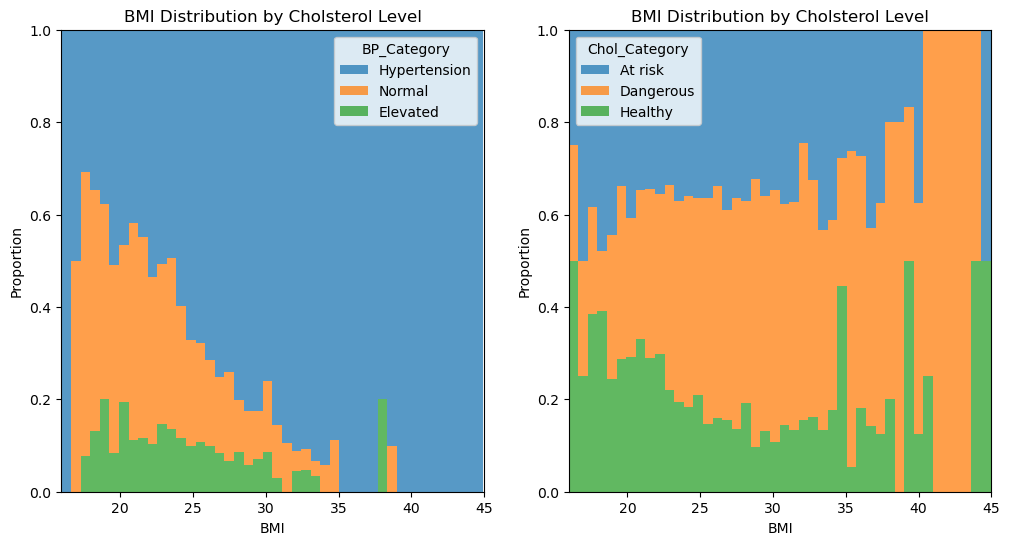

In [22]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(12,6))

sns.histplot(data=med_df, x='BMI', hue='BP_Category', multiple='fill', edgecolor='none', ax=ax0)
ax0.set_title('BMI Distribution by Cholsterol Level')
ax0.set_xlabel('BMI')
ax0.set_ylabel('Proportion')
ax0.set_xlim(med_df['BMI'].min(), 45)

sns.histplot(data=med_df, x='BMI', hue='Chol_Category', multiple='fill', edgecolor='none', ax=ax1)
ax1.set_title('BMI Distribution by Cholsterol Level')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Proportion')
ax1.set_xlim(med_df['BMI'].min(), 45)

plt.show()

As we know, there is a strong correlation between obesity and cardiovascular disease. While BMI measurement may not be 100% accurate, it can provide a reliable indication of whether an individual is overweight and can help assess their risk of developing cardiovascular disease.

The left plot illustrates the ratio of blood pressure levels across different BMI values. To ensure clarity, the maximum BMI value has been truncated due to the limited number of samples above 45. We observe a decreasing proportion of individuals with "Normal" blood pressure as BMI increases, while the proportion of individuals with "Hypertension" rises with higher BMI values. This suggests a potential association between elevated BMI and higher blood pressure levels.

Additionally, as BMI increases, the proportion of individuals with "Healthy" decreases, while the proportion of individuals with "Dangerous" blood pressure levels, increases accordingly.

#### Heart Rate Analysis

According to information from the [British Heart Foundation](https://www.bhf.org.uk/informationsupport/heart-matters-magazine/medical/ask-the-experts/pulse-rate), the normal range for heart rate is typically between 60 beats per minute (bpm) and 100 bpm. However, it is important to note that heart rate can vary significantly depending on factors such as the individual's current state or the effects of age.


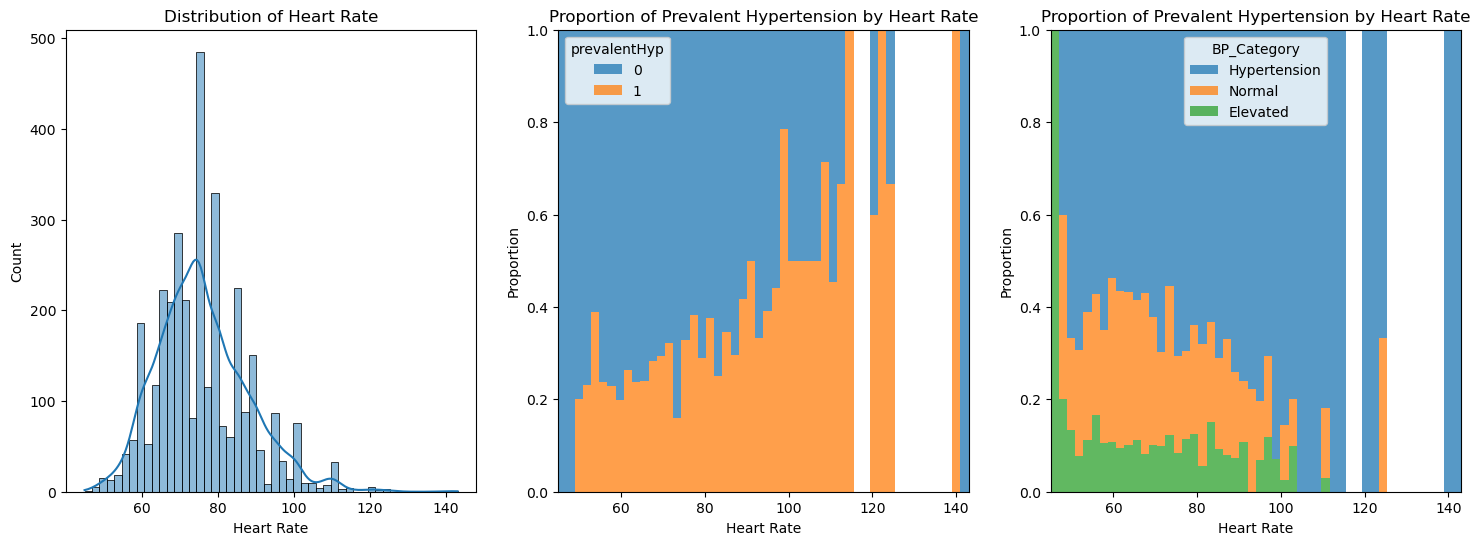

In [23]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18,6))

sns.histplot(data=med_df, x='heartRate', kde=True, ax=ax0)
ax0.set_xlabel('Heart Rate')
ax0.set_title('Distribution of Heart Rate')

sns.histplot(data=med_df, x='heartRate', hue='prevalentHyp', multiple='fill', edgecolor='none', ax=ax1)
ax1.set_xlabel('Heart Rate')
ax1.set_ylabel('Proportion')
ax1.set_title('Proportion of Prevalent Hypertension by Heart Rate')

sns.histplot(data=med_df, x='heartRate', hue='BP_Category', multiple='fill', edgecolor='none', ax=ax2)
ax2.set_xlabel('Heart Rate')
ax2.set_ylabel('Proportion')
ax2.set_title('Proportion of Prevalent Hypertension by Heart Rate')

plt.show()

The distribution plot on the left shows the population density of patients' heart rates, with the highest density occurring around 78 bpm. This indicates that a significant number of patients have heart rates within the normal range of 60-100 bpm.

The middle plot illustrates the proportion of patients with or without prevalent hypertension based on their heart rates. It reveals that as the heart rate increases, the proportion of patients with coronary heart disease (CHD) also tends to increase. This suggests a positive association between heart rate and the risk of hypertension.

The right plot displays the proportion of patients in different blood pressure categories based on their heart rates. It demonstrates that as the heart rate increases, the proportion of patients in the hypertension category also tends to increase. This underscores the impact of heart rate on the risk of hypertension.

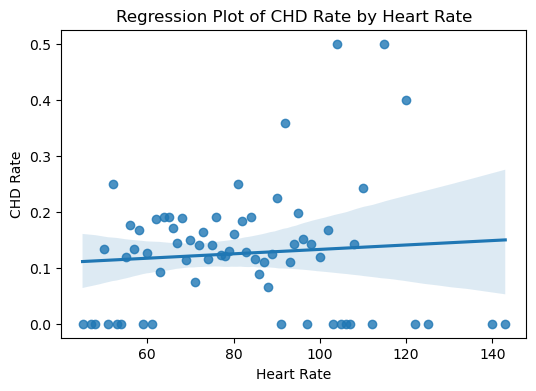

In [24]:
plt.figure(figsize=(6,4))
HR_CHD = med_df.groupby('heartRate')['TenYearCHD'].mean()
sns.regplot(x=HR_CHD.index, y=HR_CHD.values)
plt.xlabel('Heart Rate')
plt.ylabel('CHD Rate')
plt.title('Regression Plot of CHD Rate by Heart Rate')
plt.show()

Above is the regression line depicting the relationship between CHD rate and heart rate. Interestingly, despite the association between CHD rate and hypertension, the slope of the line indicates a less pronounced relationship between CHD and heart rate. The nearly horizontal slope suggests that the impact of heart rate on CHD rate may be minimal or insignificant.

#### Glucose level analysis

Blood glucose level is a risk factor for diabetes, and it is typically measured using fasting blood glucose concentration. The **World Health Organization (WHO)** provides [risk categories](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380) based on the measured values, as follows:

|Status|Glucose Level (mg/dL)|
|--|--|
|Hypoglycemia|<70|
|Normal|70-99|
|At risk|100-125|
|Diabetes|≥126|

<function matplotlib.pyplot.show(close=None, block=None)>

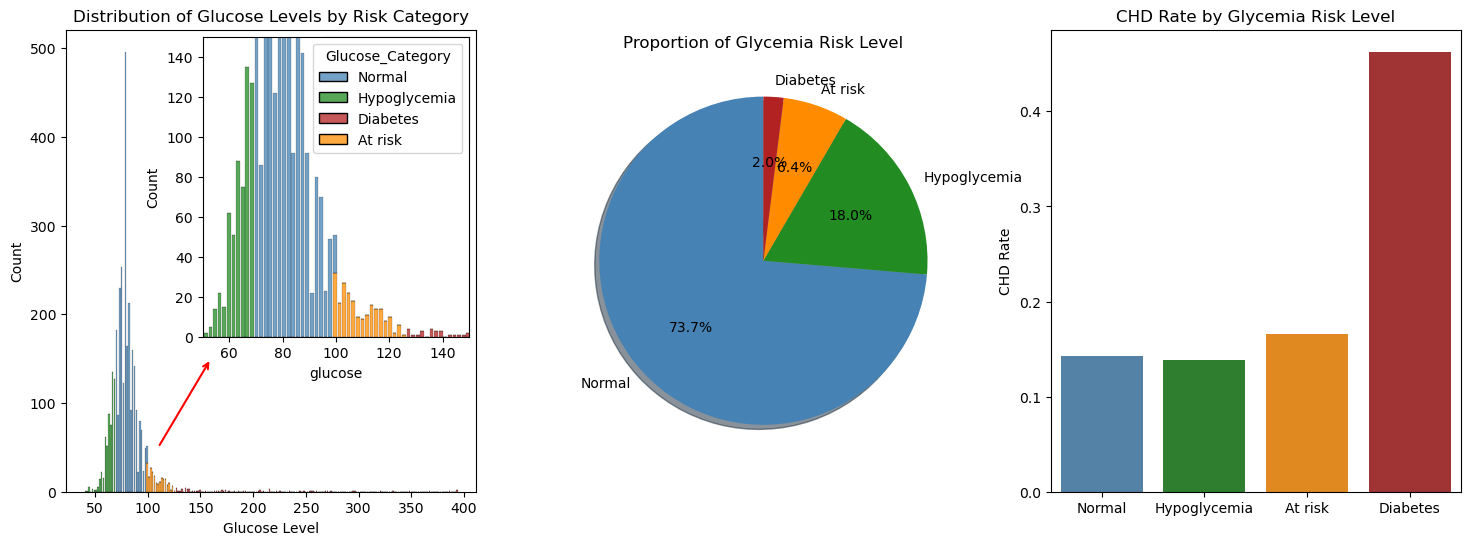

In [25]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18,6))

glucose_colors = {'Hypoglycemia': 'forestgreen', 'Normal': 'steelblue', 'At risk': 'darkorange', 'Diabetes': 'firebrick'}
med_df.loc[(med_df['glucose'] < 70), 'Glucose_Category'] = 'Hypoglycemia'
med_df.loc[(med_df['glucose'] >= 70) & (med_df['glucose'] < 100), 'Glucose_Category'] = 'Normal'
med_df.loc[(med_df['glucose'] >= 100) & (med_df['glucose'] < 126), 'Glucose_Category'] = 'At risk'
med_df.loc[(med_df['glucose'] > 126), 'Glucose_Category'] = 'Diabetes'

sns.histplot(data=med_df, x='glucose', multiple='stack', hue='Glucose_Category', shrink=0.8, palette=glucose_colors, ax=ax0)
ax0.set_title('Distribution of Glucose Levels by Risk Category')
ax0.set_xlabel('Glucose Level')

ax_inset = inset_axes(ax0, width='65%', height='65%')
sns.histplot(data=med_df, x='glucose', multiple='stack', hue='Glucose_Category', shrink=0.8, palette=glucose_colors, ax=ax_inset)
ax_inset.set_xlim([50, 150])
ax_inset.set_ylim([0, 150])
arrowprops = {'arrowstyle': '->', 'linewidth': 1.5, 'color': 'red'}
ax0.annotate('', xy=(160, 150), xytext=(110, 50), arrowprops=arrowprops)


ax1.pie(med_df['Glucose_Category'].value_counts(), labels=med_df['Glucose_Category'].value_counts().index,
        startangle=90, shadow=True, autopct='%.1f%%',
        colors=[glucose_colors[val] for val in med_df['Glucose_Category'].value_counts().index])
ax1.set_title('Proportion of Glycemia Risk Level')

med_df_sorted = med_df.sort_values(by='TenYearCHD')
sns.barplot(data=med_df_sorted, x='Glucose_Category',y='TenYearCHD', palette=glucose_colors, errorbar=None, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('CHD Rate')
ax2.set_title('CHD Rate by Glycemia Risk Level')

plt.show

From the histogram, we observe that the majority of patients are concentrated in the glucose level range of around 80 mg/dL. The left plot magnifies the area within the range of 50 to 150 mg/dL and displays the corresponding proportion of patients with CHD. From the proportion plot, we can observe that the glucose levels remain consistently below 100 mg/dL. However, as the risk level increases to the range of 100-125 mg/dL, the proportion of patients with CHD shows a tendency to increase. Furthermore, as the glucose level increases to the Diabetes category, the proportion of CHD patients sharply rises.

The right plot illustrates the CHD rate according to the risk categories. It reveals that patients in the at-risk glucose level category exhibit a similar CHD rate compared to those in the Normal and Hypoglycemia categories. However, patients in the Diabetes category have a significantly higher CHD rate of approximately 0.45, which is nearly three times higher than the rate in the other categories.

# *Data Preprocessing*

## Original Data

In [26]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [27]:
# Separate feature and target and less relavent column
X = df.drop(['heartRate', 'is_smoking', 'cigsPerDay', 'TenYearCHD'], axis=1)
Y = df['TenYearCHD'].to_numpy()
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (3390, 12)
Y shape:  (3390,)


In [28]:
# One-Hot Encoder
categorical = ['education', 'sex', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']
X_OHE = pd.get_dummies(data=X, columns=categorical)
print('Shape before one-hot encoding: ',X_OHE.shape)
X_OHE.head()

Shape before one-hot encoding:  (3390, 20)


,age,totChol,sysBP,diaBP,BMI,glucose,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
0,64,221.0,148.0,85.0,25.38,80.0,0,1,0,0,1,0,1,0,1,0,1,0,1,0
1,36,212.0,168.0,98.0,29.77,75.0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
2,46,250.0,116.0,71.0,20.35,94.0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
3,50,233.0,158.0,88.0,28.26,94.0,1,0,0,0,0,1,1,0,1,0,0,1,1,0
4,64,241.0,136.5,85.0,26.42,77.0,1,0,0,0,1,0,1,0,1,0,1,0,1,0


In [29]:
# Normalization
transform = preprocessing.StandardScaler()
X_transform = transform.fit_transform(X_OHE)
X_transform
X_train, X_test, Y_train, Y_test = train_test_split(X_transform, Y, test_size=0.2, random_state=seed)
print('Shape of training set: \n X_train ',X_train.shape, '\n Y_train ', Y_train.shape, '\n')
print('Shape of test set: \n X_test ', X_test.shape, '\n Y_test ', Y_test.shape)

Shape of training set: 
 X_train  (2712, 20) 
 Y_train  (2712,) 

Shape of test set: 
 X_test  (678, 20) 
 Y_test  (678,)


## Categorized Data

In this analysis, I would like to compare the results from the categorized data with original data.

In [30]:
med_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,BP_Category,Chol_Category,BMI_Category,Glucose_Category
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,Hypertension,At risk,Overweight,Normal
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,Hypertension,At risk,Overweight,Normal
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,Normal,Dangerous,Healthy,Normal
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,Hypertension,At risk,Overweight,Normal
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,Hypertension,Dangerous,Overweight,Normal


In [31]:
# Separate feature and target and less relavent column
X2 = med_df.drop(['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'is_smoking', 'cigsPerDay', 'TenYearCHD'], axis=1)
Y2 = med_df['TenYearCHD'].to_numpy()
print('X2 shape: ', X2.shape)
print('Y2 shape: ', Y2.shape)

X2 shape:  (3390, 11)
Y2 shape:  (3390,)


In [32]:
# One-Hot Encoder
categorical = ['education', 'sex', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'BP_Category', 'Chol_Category', 'BMI_Category', 'Glucose_Category']
X2_OHE = pd.get_dummies(data=X2, columns=categorical)
print('Shape before one-hot encoding: ',X2_OHE.shape)
X2_OHE.head()

Shape before one-hot encoding:  (3390, 29)


,age,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,...,Chol_Category_Dangerous,Chol_Category_Healthy,BMI_Category_Healthy,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight,Glucose_Category_At risk,Glucose_Category_Diabetes,Glucose_Category_Hypoglycemia,Glucose_Category_Normal
0,64,0,1,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
1,36,0,0,0,1,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
2,46,1,0,0,0,1,0,1,0,1,...,1,0,1,0,0,0,0,0,0,1
3,50,1,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,64,1,0,0,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1


In [33]:
# Normalization
transform = preprocessing.StandardScaler()
X2_transform = transform.fit_transform(X2_OHE)
X2_transform
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2_transform, Y2, test_size=0.2, random_state=seed)
print('Shape of training set: \n X2_train ',X2_train.shape, '\n Y2_train ', Y2_train.shape, '\n')
print('Shape of test set: \n X2_test ', X2_test.shape, '\n Y2_test ', Y2_test.shape)

Shape of training set: 
 X2_train  (2712, 29) 
 Y2_train  (2712,) 

Shape of test set: 
 X2_test  (678, 29) 
 Y2_test  (678,)


# *Train Models*

In [34]:
# Build models and evaluation
def train_models(X_train, Y_train, X_test, Y_test):
    models = {'Logistic Regression': LogisticRegression(),
              'Decision Tree': DecisionTreeClassifier(),
              'Random Forest': RandomForestClassifier(),
              'k-Nearest Neighbor': KNeighborsClassifier(),
              'SVM': SVC()}

    training_results = []

    for name, model in models.items():
        start = time.time()
        model.fit(X_train, Y_train)
        end = time.time()
        training_time = end - start

        Yhat = model.predict(X_test)
        accuracy_score = metrics.accuracy_score(Y_test, Yhat)
        
        training_results.append({'Model': name,
                                 'Accuracy': '{:.2f}%'.format(accuracy_score*100),
                                 'Training Time': '{:.2f}'.format(training_time)})
    
    training_df = pd.DataFrame(training_results)
    return training_df

In [35]:
# Original
train_models(X_train, Y_train, X_test, Y_test)

,Model,Accuracy,Training Time
0,Logistic Regression,86.43%,0.02
1,Decision Tree,72.27%,0.04
2,Random Forest,85.25%,0.59
3,k-Nearest Neighbor,83.04%,0.00
4,SVM,85.55%,0.24


In [36]:
# Categorized
train_models(X2_train, Y2_train, X2_test, Y2_test)

,Model,Accuracy,Training Time
0,Logistic Regression,85.69%,0.02
1,Decision Tree,76.25%,0.02
2,Random Forest,82.15%,0.49
3,k-Nearest Neighbor,82.01%,0.00
4,SVM,85.99%,0.27


In [37]:
# DNN model
def dnn_model(X_train, Y_train, X_test, Y_test):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(63, activation='relu', input_dim=X_train.shape[1]),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, Y_train, epochs=12, batch_size=32, validation_data=(X_test, Y_test))

    loss, accuracy = model.evaluate(X_test, Y_test)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))

In [38]:
# Original
dnn_model(X_train, Y_train, X_test, Y_test)

Epoch 1/12
85/85 [==============================] - 1s 5ms/step - loss: 0.4383 - accuracy: 0.8337 - val_loss: 0.3872 - val_accuracy: 0.8599
Epoch 2/12
85/85 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8488 - val_loss: 0.3855 - val_accuracy: 0.8555
Epoch 3/12
85/85 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8503 - val_loss: 0.3874 - val_accuracy: 0.8569
Epoch 4/12
85/85 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8529 - val_loss: 0.3871 - val_accuracy: 0.8584
Epoch 5/12
85/85 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8525 - val_loss: 0.3895 - val_accuracy: 0.8599
Epoch 6/12
85/85 [==============================] - 0s 3ms/step - loss: 0.3736 - accuracy: 0.8529 - val_loss: 0.3907 - val_accuracy: 0.8555
Epoch 7/12
85/85 [==============================] - 0s 2ms/step - loss: 0.3708 - accuracy: 0.8529 - val_loss: 0.3849 - val_accuracy: 0.8584
Epoch 8/12
85/85 [==

In [39]:
# Categorized
dnn_model(X2_train, Y2_train, X2_test, Y2_test)

Epoch 1/12
85/85 [==============================] - 1s 4ms/step - loss: 0.4417 - accuracy: 0.8352 - val_loss: 0.3809 - val_accuracy: 0.8599
Epoch 2/12
85/85 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8503 - val_loss: 0.3827 - val_accuracy: 0.8599
Epoch 3/12
85/85 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8518 - val_loss: 0.3851 - val_accuracy: 0.8569
Epoch 4/12
85/85 [==============================] - 0s 3ms/step - loss: 0.3730 - accuracy: 0.8521 - val_loss: 0.3883 - val_accuracy: 0.8569
Epoch 5/12
85/85 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8529 - val_loss: 0.3921 - val_accuracy: 0.8555
Epoch 6/12
85/85 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8569 - val_loss: 0.3951 - val_accuracy: 0.8584
Epoch 7/12
85/85 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8577 - val_loss: 0.3978 - val_accuracy: 0.8584
Epoch 8/12
85/85 [==